In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [159]:
pd_absence_cleaned = pd.read_csv('AbsenteeismCleaned.csv')

In [160]:
pd_absence_cleaned.head()

,Unnamed: 0,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [161]:
pd_absence_cleaned.keys()

Index(['Unnamed: 0', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Month Value', 'Day of the Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [162]:
pd_absence_cleaned.loc[:,['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']]

,Reason_1,Reason_2,Reason_3,Reason_4
0,0,0,0,1
1,0,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
695,1,0,0,0
696,1,0,0,0
697,1,0,0,0
698,0,0,0,1


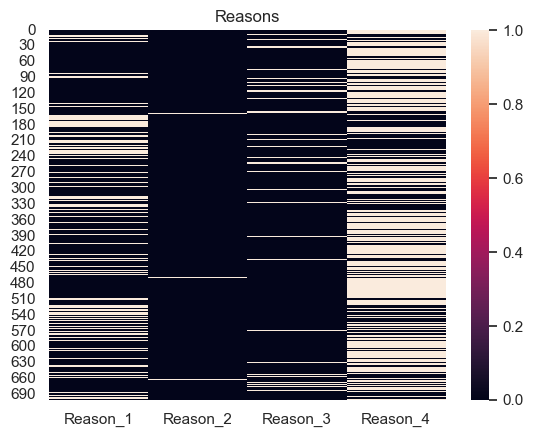

In [163]:
ax = sns.heatmap(pd_absence_cleaned.loc[:,['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']])
ax.set_title('Reasons')
plt.show()
# Reason 2 seems to be really rare. Thus, I think that it's better to skip this column for now.

In [164]:
pd_absence_1 = pd_absence_cleaned.drop('Reason_2', axis=1)
pd_absence_1

,Unnamed: 0,Reason_1,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,1,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,2,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,3,1,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,4,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,1,0,0,5,2,179,22,40,237.656,22,1,2,0,8
696,696,1,0,0,5,2,225,26,28,237.656,24,0,1,2,3
697,697,1,0,0,5,3,330,16,28,237.656,25,1,0,0,8
698,698,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2


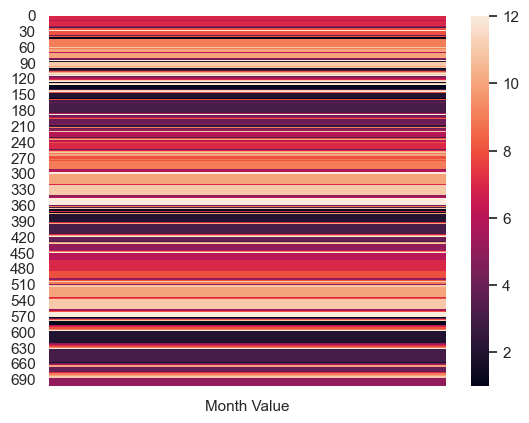

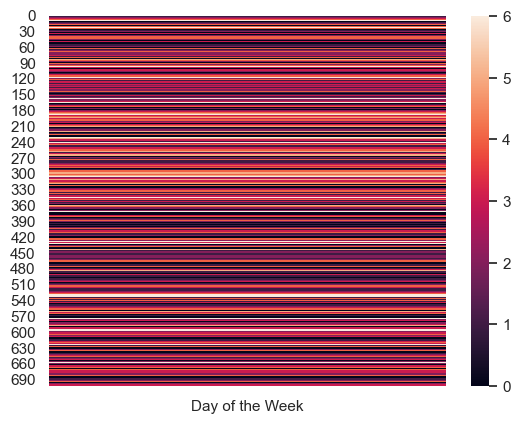

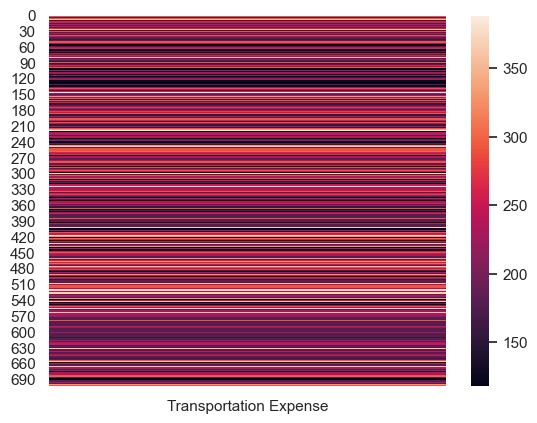

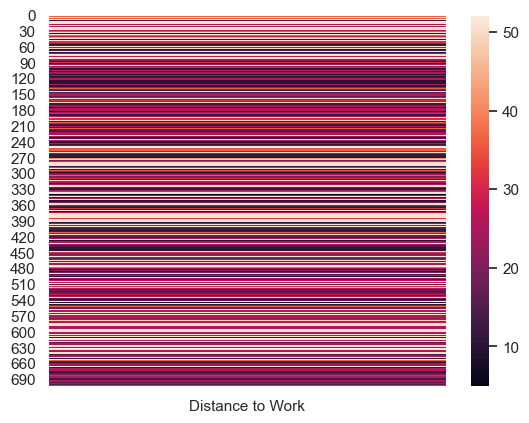

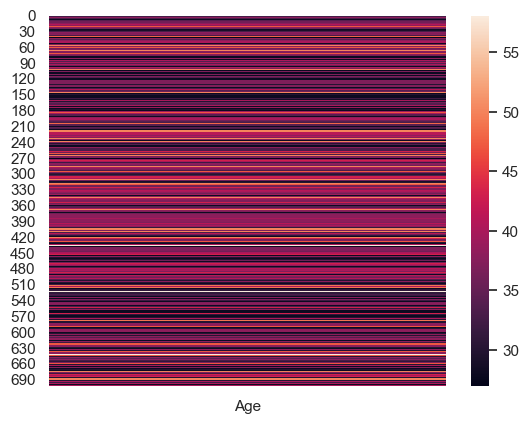

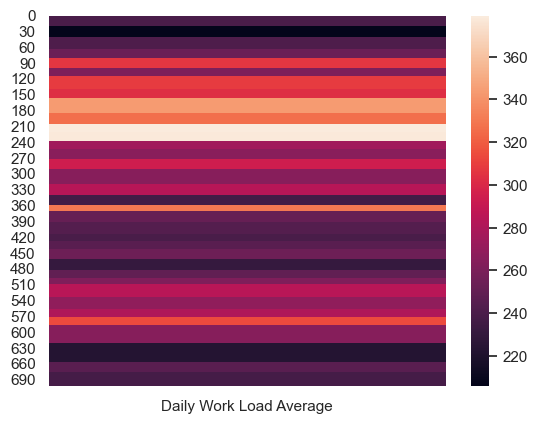

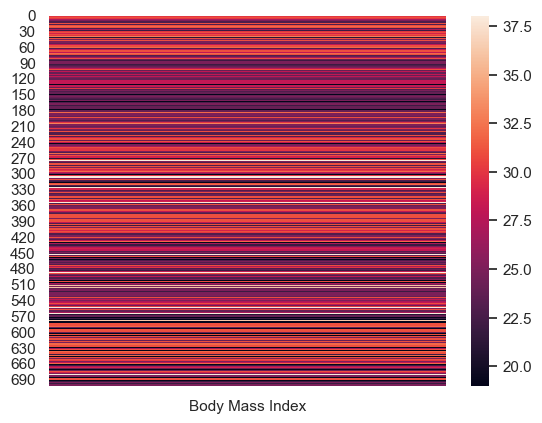

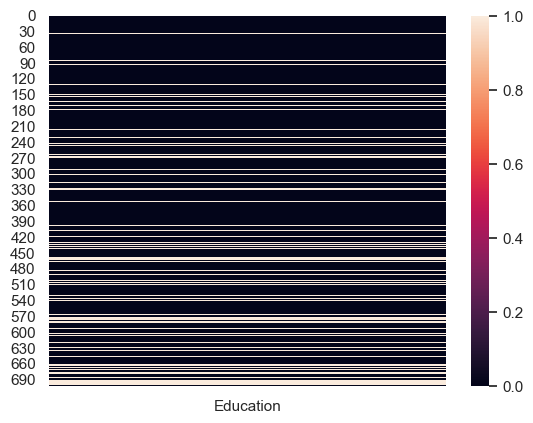

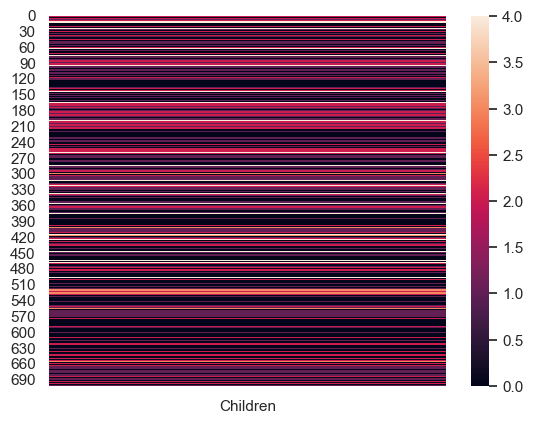

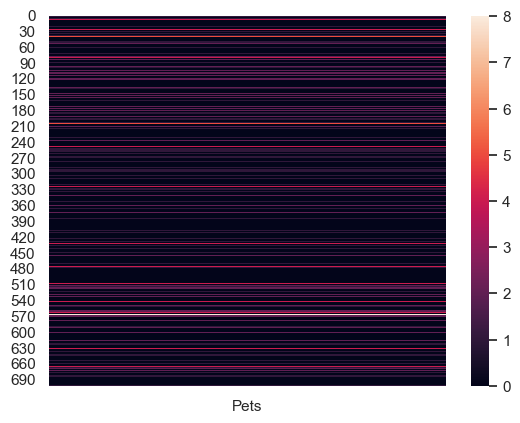

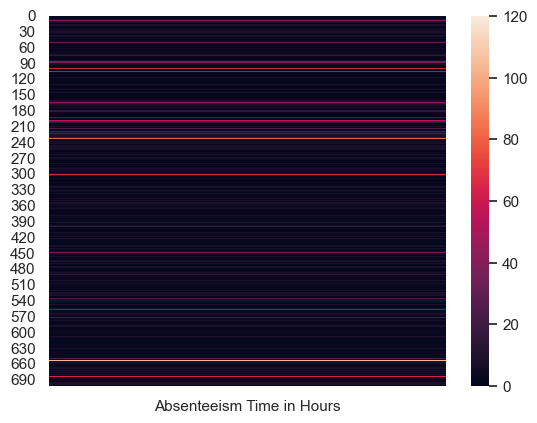

In [165]:
data_for_heatmap = ['Month Value', 'Day of the Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']
for feature in data_for_heatmap:
       sns.heatmap(pd_absence_cleaned.loc[:,[feature]])
       plt.show()

# All other features look good and balanced

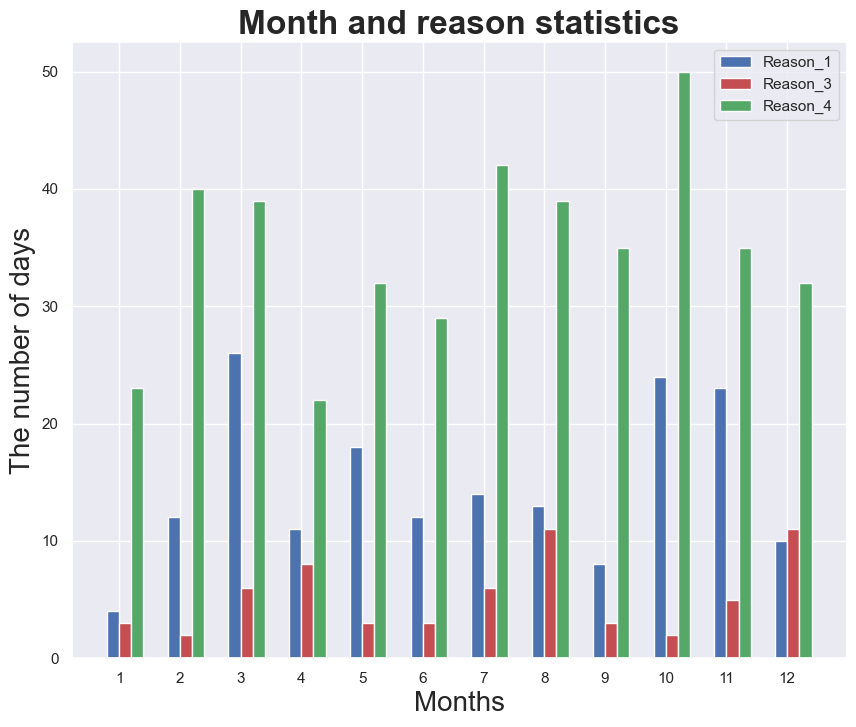

In [166]:
sr_reasons = ['Reason_1', 'Reason_3', 'Reason_4']
width = 0.2

pd_months_reason = pd_absence_1.groupby('Month Value')[sr_reasons].sum()

plt.figure(figsize = (10,8))

plt.bar(pd_months_reason.index, pd_months_reason['Reason_1'], color='b',
        width = width, label='Reason_1')

plt.bar(pd_months_reason.index + width, pd_months_reason['Reason_3'], color='r',
        width = width, label='Reason_3')


plt.bar(pd_months_reason.index + width*2, pd_months_reason['Reason_4'], color='g',
        width = width, label='Reason_4')

plt.xticks(pd_months_reason.index + width/2, pd_months_reason.index)
plt.xlabel('Months', fontsize=20)
plt.ylabel('The number of days', fontsize=20)
plt.title('Month and reason statistics', fontsize=24, fontweight='bold')
plt.legend()
plt.show()


#Reason_4 dominates. I suppose that Reason_4 is connected with sick issues as it's the most
# popular reason to stay home. However, I don't see a strong correlation between cold seasons and 
# Reason_4.

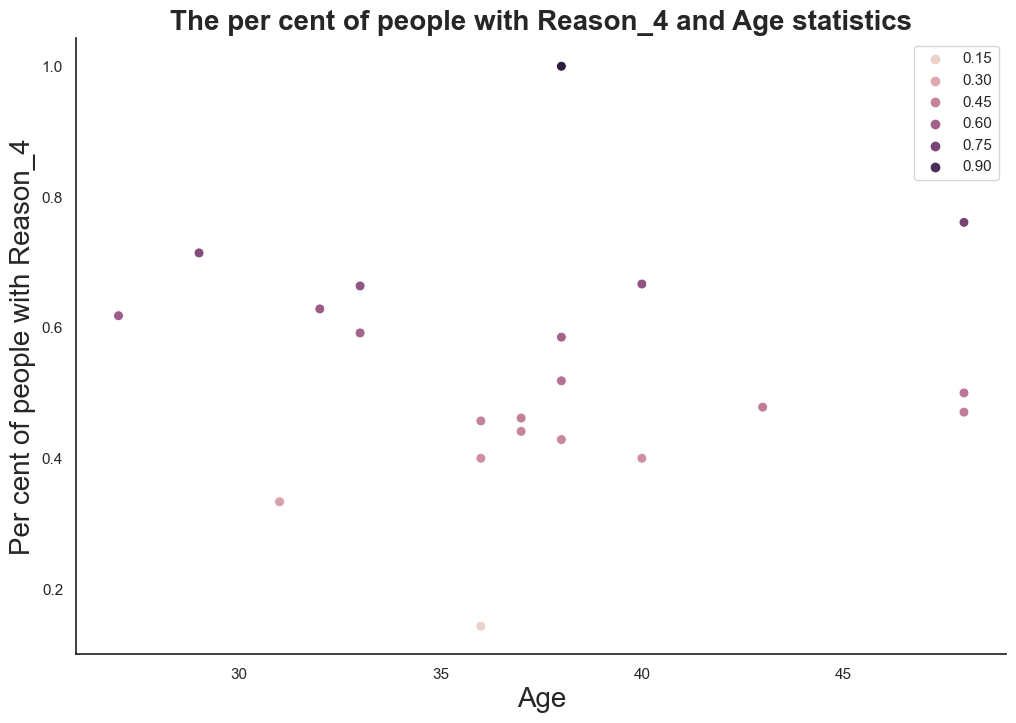

In [167]:
# Okay, assume that Reason_4 is something about sickness. It's logical that old people are supposed to
# be off more often. Let's check it
sr_percent = pd_absence_1.groupby('Age')['Reason_4'].sum() / pd_absence_1['Age'].value_counts()

plt.figure(figsize=(12,8))

sns.set_style('white')
sns.scatterplot(pd_absence_1,
                x = pd_absence_1['Age'],
                y = sr_percent,
                hue = sr_percent,
                s = 50
                )
plt.title('The per cent of people with Reason_4 and Age statistics', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Per cent of people with Reason_4', fontsize=20)
sns.despine()
plt.show()

# Well, about a half of the people between 35s and 40s are absent due to Reason_4.
# It's still hard to say for sure that it's something about sickness

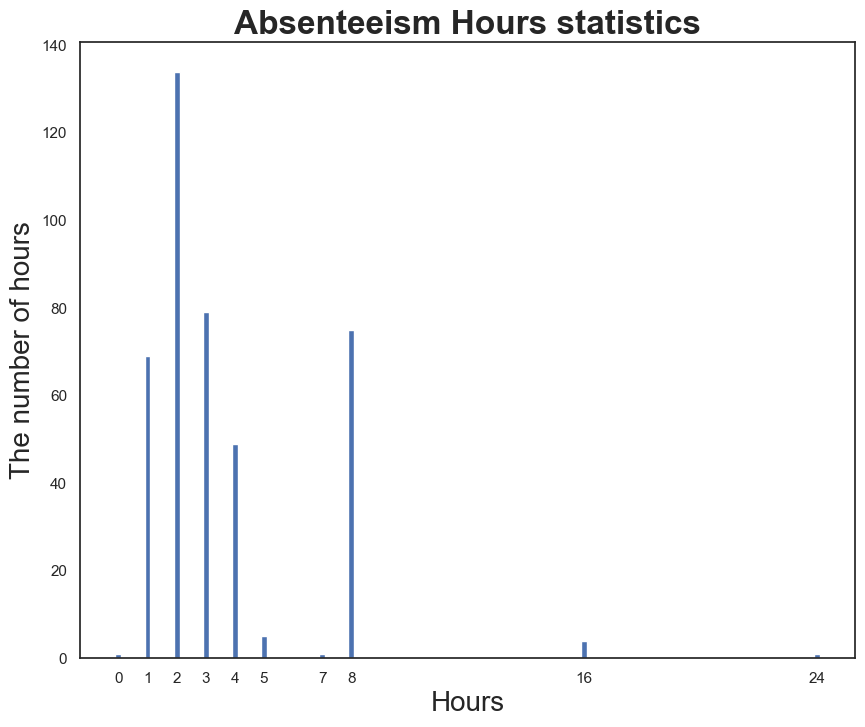

In [168]:
# Okay, last try. If someone is sick they're likely off for a long period of time.

sr_hours_reason_4 = pd_absence_1.groupby('Absenteeism Time in Hours')['Reason_4'].sum()
sr_hours_reason_4 = sr_hours_reason_4[sr_hours_reason_4 > 0]

plt.figure(figsize = (10,8))

plt.bar(sr_hours_reason_4.index, sr_hours_reason_4, color='b',
        width = width)

plt.xticks(sr_hours_reason_4.index, sr_hours_reason_4.index)
plt.xlabel('Hours', fontsize=20)
plt.ylabel('The number of hours', fontsize=20)
plt.title('Absenteeism Hours statistics', fontsize=24, fontweight='bold')
plt.show()

# Okay, I have to admit... I have no idea what's inside the Reason_4=) It's not a problem with health I guess...

<h3> Some other statistics </h3>

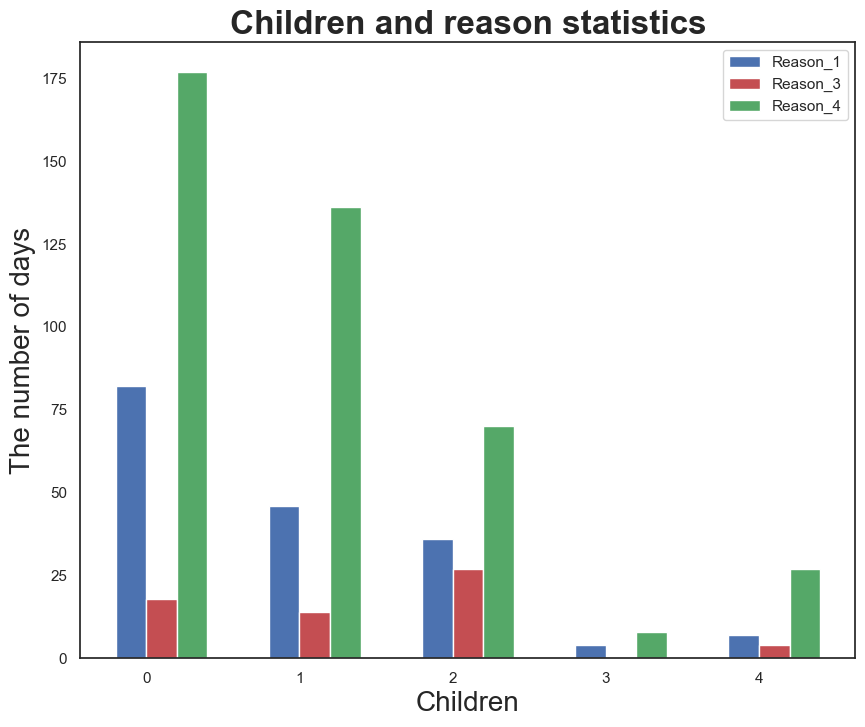

In [169]:
width = 0.2

pd_child_reason = pd_absence_1.groupby('Children')[sr_reasons].sum()
plt.figure(figsize = (10,8))

plt.bar(pd_child_reason.index, pd_child_reason['Reason_1'], color='b',
        width = width, label='Reason_1')

plt.bar(pd_child_reason.index + width, pd_child_reason['Reason_3'], color='r',
        width = width, label='Reason_3')


plt.bar(pd_child_reason.index + width*2, pd_child_reason['Reason_4'], color='g',
        width = width, label='Reason_4')

plt.xticks(pd_child_reason.index + width/2, pd_child_reason.index)
plt.xlabel('Children', fontsize=20)
plt.ylabel('The number of days', fontsize=20)
plt.title('Children and reason statistics', fontsize=24, fontweight='bold')
plt.legend()
plt.show()


# Hmmm... Children are not a reason to have a day off.
# On the contrary, according to the data if we have a lot of children, we need to absent less=)

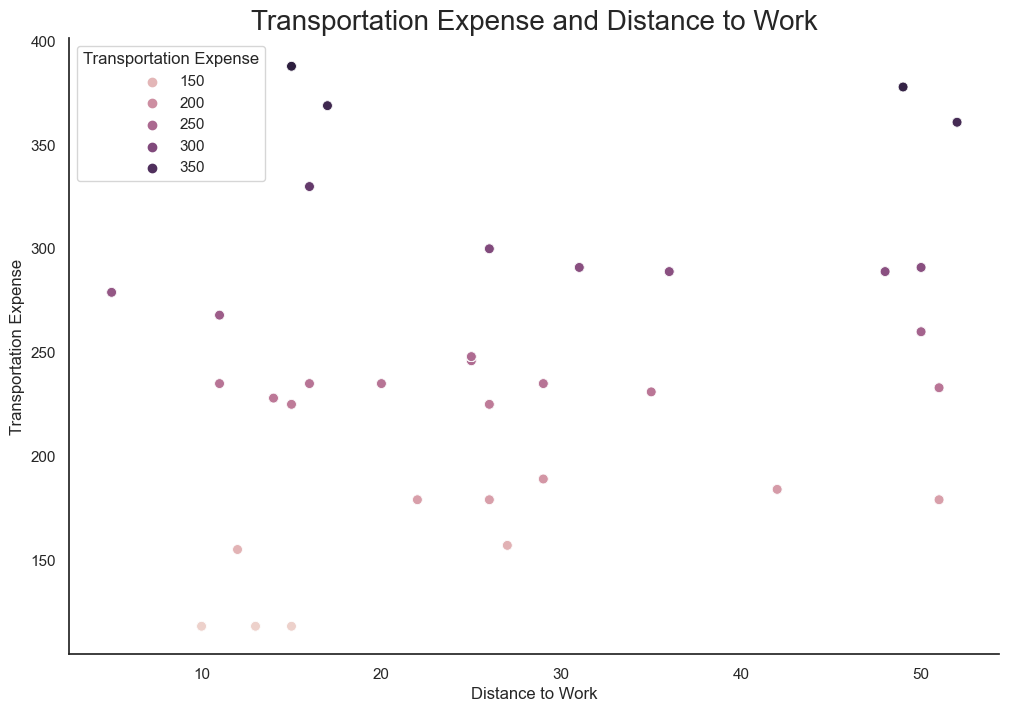

In [170]:
plt.figure(figsize=(12,8))

sns.set_style('white')
sns.scatterplot(pd_absence_1,
                x = pd_absence_1['Distance to Work'],
                y = pd_absence_1['Transportation Expense'],
                hue = pd_absence_1['Transportation Expense'],
                s = 50
                )
plt.title('Transportation Expense and Distance to Work', fontsize=20)
sns.despine()
plt.show()

# That's strange. I expected that as far from work employees live as more they spend on transportation.

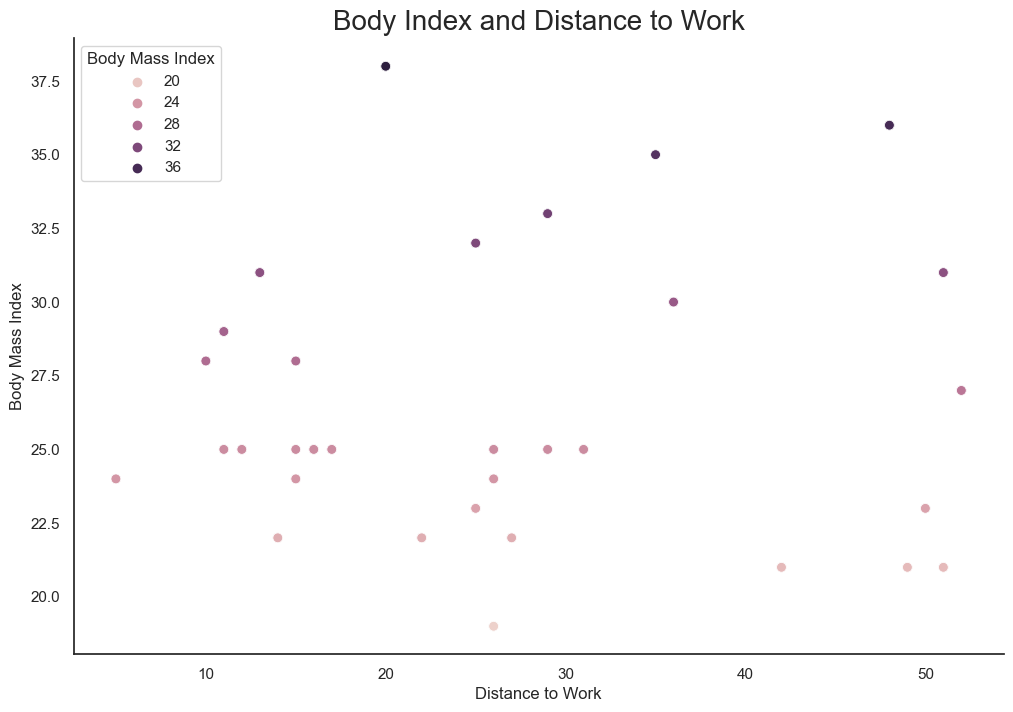

In [171]:
plt.figure(figsize=(12,8))

sns.set_style('white')
sns.scatterplot(pd_absence_1,
                x = pd_absence_1['Distance to Work'],
                y = pd_absence_1['Body Mass Index'],
                hue = pd_absence_1['Body Mass Index'],
                s = 50
                )
plt.title('Body Index and Distance to Work', fontsize=20)
sns.despine()
plt.show()